In [36]:
import os
print(os.listdir(os.getcwd()))

['README.md', '.gitignore', '.ipynb_checkpoints', '.git', 'Project-SIA']


In [14]:
#1. Setup: Import Libraries
%pip install pandas 
%pip install linearmodels
%pip install openpyxl
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import QuantileTransformer
import linearmodels as lnr
import linearmodels.iv as lnv

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Project overview:
#"Drivers of CO₂ Emissions in the European Union (1960–2023)
#This research models the determinants of CO₂ emissions, focusing on energy consumption, urbanization rate, and industrial production, 
#and examines their impact on GDP per capita in European Union countries from 1960 to 2023. 
#Understanding these relationships provides valuable insights for policymakers to develop sustainable economic and environmental strategies.

In [38]:
#2. Load the Data
#First, load the data from the Excel file. The read_excel() function from pandas will be used to import the dataset.
import pandas as pd
df = pd.read_excel("./Data.xlsx")
# Show the Dataframe
df

,Indicator Name,GDP per capita (current US$),Urban population (% of total population),Energy use (kg of oil equivalent per capita),F-gases emissions from Industrial Processes (Mt CO2e)
0,1960,796.543,58.684,1483.675,0.000
1,1961,877.723,59.222,1537.649,0.000
2,1962,962.060,59.757,1651.168,0.000
3,1963,1048.011,60.341,1762.760,0.000
4,1964,1152.265,60.925,1839.867,0.000
...,...,...,...,...,...
59,2019,35341.570,74.742,0.000,85.885
60,2020,34635.490,74.965,0.000,86.581
61,2021,39180.376,75.222,0.000,83.868
62,2022,37948.951,75.463,0.000,82.961


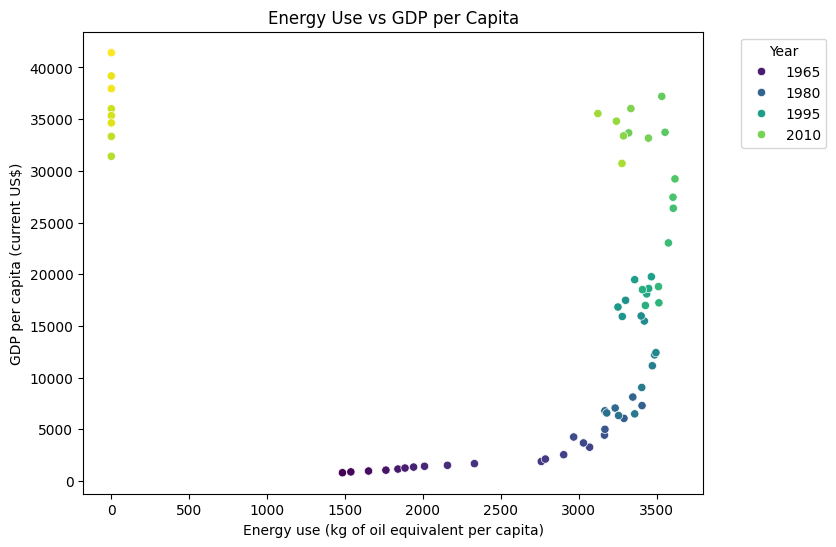

In [42]:
#3. Exploratory Data Analysis (EDA)
#Here, we replicate the exploratory data analysis using visualizations and transformations.
def plot_energy_vs_gdp(df, x='Energy use (kg of oil equivalent per capita)', 
                       y='GDP per capita (current US$)', hue='Indicator Name', 
                       palette='viridis'):
    """
    Generates a scatter plot visualizing the relationship between energy use 
    and GDP per capita, categorized by the 'Indicator Name'.

    This plot helps identify trends and correlations between economic growth 
    and energy consumption.

    Parameters:
        df (DataFrame): The dataset containing the required columns.
        x (str): 'Energy use (kg of oil equivalent per capita)' - Represents energy consumption per capita.
        y (str): 'GDP per capita (current US$)' - Represents economic output per person.
        hue (str): 'Indicator Name' - Used to differentiate data points by category.
        palette (str): 'viridis' - A color map for better visualization.
        
    The function also customizes the figure size, title, and legend positioning.
    """
    # Create the scatter plot
    plt.figure(figsize=(8, 6))  # Adjust the figure size
    sns.scatterplot(data=df, x=x, y=y, hue=hue, palette=palette)

    # Set plot title and legend
    plt.title('Energy Use vs GDP per Capita')
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Optional: move legend outside plot

    # Display the plot
    plt.show()
    # Call the function
plot_energy_vs_gdp(df)

In [5]:
#Description
#In this step of the Exploratory Data Analysis (EDA), 
#we create a scatter plot to visualize the relationship between Energy Use (kg of oil equivalent per capita) and GDP per Capita (current US$). 
#The scatter plot allows us to assess how higher GDP correlates with higher energy consumption, 
#helping to identify trends or patterns in the data. By using Seaborn’s scatterplot function, 
#we were able to explore the distribution of these two variables and detect outliers and unusual behavior, such as yellow points indicating
#0 energy consumption after 2010)
#This visualization is an essential part of EDA, as it provides insights that guide further analysis and hypothesis testing.

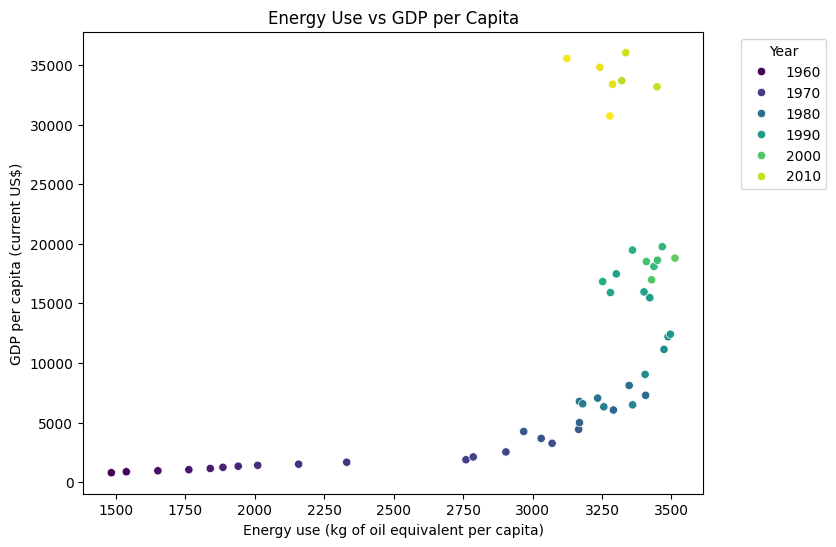

In [43]:
#Filter out outliers
def plot_energy_vs_gdp(df: pd.DataFrame, x: str = 'Energy use (kg of oil equivalent per capita)', 
                       y: str = 'GDP per capita (current US$)', hue: str = 'Indicator Name', 
                       palette: str = 'viridis'):
    """
    Filters the dataset based on the 10th and 90th percentiles of energy use 
    and generates a scatter plot to visualize the relationship between energy use 
    and GDP per capita.

    Steps:
    1. Compute the lower (10th percentile) and upper (90th percentile) quantiles 
       for 'Energy use (kg of oil equivalent per capita)'.
    2. Filter the dataset to exclude extreme values, keeping only data within 
       the specified quantile range.
    3. Generate a scatter plot with the filtered dataset to analyze trends 
       between energy use and GDP per capita.

    Parameters:
        df (DataFrame): The dataset containing 'Energy use' and 'GDP per capita'.
        x (str): 'Energy use (kg of oil equivalent per capita)' - Represents 
                 per capita energy consumption.
        y (str): 'GDP per capita (current US$)' - Represents economic output per person.
        hue (str): 'Indicator Name' - Differentiates data points based on year or category.
        palette (str): 'viridis' - Color scheme for visualization.

    Visualization:
    - The plot highlights the energy-GDP relationship while avoiding outliers.
    - The legend is positioned outside the plot for better clarity.
    """
    # Compute the lower and upper quantiles for 'Energy use (kg of oil equivalent per capita)'
    lower_quantile = df[x].quantile(0.1)
    upper_quantile = df[x].quantile(0.9)

    # Filter the dataset to exclude the extreme values outside the quantile range
    df_filtered = df[(df[x] > lower_quantile) & (df[x] <= upper_quantile)]

    # Create a scatter plot for the filtered data
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.scatterplot(data=df_filtered, x=x, y=y, hue=hue, palette=palette)

    # Set plot title and legend positioning
    plt.title('Energy Use vs GDP per Capita')
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside the plot
    
    # Display the plot
    plt.show()
plot_energy_vs_gdp(df)

In [7]:
#Description: Quantiles are used to filter data by selecting specific percentiles (e.g., the 10th and 90th percentiles) 
#to remove outliers and focus on the central, more typical values. By filtering between the lower and upper quantiles, 
#we exclude the extreme 10% of data on both ends, which could skew the analysis. This approach helps us focus on the main trends in the data, 
#ensuring that outliers don't distort the relationship we're studying. In visualizations, filtering with quantiles allows for clearer insights, 
#as it removes extreme values that might otherwise obscure meaningful patterns or correlations between variables.

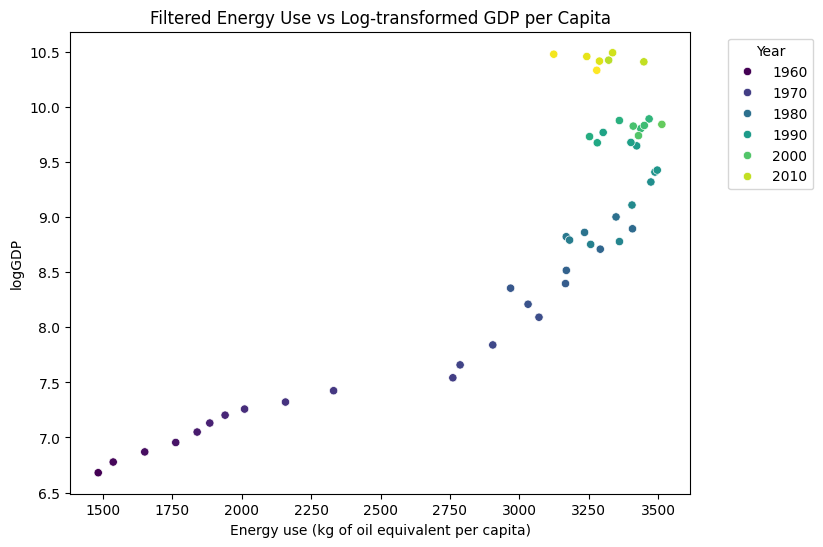

In [29]:
#Log Transformation
def plot_energy_vs_log_gdp(df: pd.DataFrame, 
                           x: str = 'Energy use (kg of oil equivalent per capita)', 
                           y: str = 'logGDP', 
                           hue: str = 'Indicator Name', 
                           palette: str = 'viridis'):
    """
    Filters the dataset based on the 10th and 90th percentiles of energy use, 
    applies a log transformation to GDP per capita, and generates a scatter plot.

    Steps:
    1. Compute the lower (10th percentile) and upper (90th percentile) quantiles 
       for 'Energy use (kg of oil equivalent per capita)'.
    2. Filter the dataset to remove extreme values, keeping only data within 
       the specified quantile range.
    3. Apply a natural logarithm transformation to 'GDP per capita (current US$)' 
       to normalize the distribution.
    4. Generate a scatter plot with the transformed data to analyze trends 
       between energy use and GDP per capita.

    Parameters:
        df (DataFrame): The dataset containing 'Energy use' and 'GDP per capita'.
        x (str): 'Energy use (kg of oil equivalent per capita)' - Represents 
                 per capita energy consumption.
        y (str): 'logGDP' - Log-transformed GDP per capita for better visualization.
        hue (str): 'Indicator Name' - Differentiates data points based on year or category.
        palette (str): 'viridis' - Color scheme for visualization.

    Visualization:
    - The log transformation of GDP per capita ensures a more linear relationship.
    - The plot highlights trends while avoiding the influence of extreme values.
    - The legend is positioned outside the plot for better clarity.
    """
    # Calculate the quantiles
    lower_quantile = df[x].quantile(0.1)
    upper_quantile = df[x].quantile(0.9)

    # Filter the data based on quantiles
    df_filtered = df[(df[x] > lower_quantile) & (df[x] <= upper_quantile)].copy()

    # Apply log transformation to GDP per capita
    df_filtered['logGDP'] = np.log(df_filtered['GDP per capita (current US$)'])

    # Create a scatter plot after log transformation
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.scatterplot(data=df_filtered, x=x, y='logGDP', hue=hue, palette=palette)

    # Set the plot title and legend position
    plt.title('Filtered Energy Use vs Log-transformed GDP per Capita')
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

    # Display the plot
    plt.show()
plot_energy_vs_log_gdp(df)

In [9]:
#Description: We use the log transformation on GDP per capita to address several issues often found in economic data. 
#First, it helps to reduce skewness, as GDP typically has a small number of countries with very high values, and the majority have much lower values. 
#By applying the log, the data becomes more symmetric, improving analysis. 
#Second, it helps to linearize relationships between variables, especially when the relationship between energy use and GDP is non-linear. 
#This is crucial for methods that assume linearity, such as regression. 
#Additionally, the log transformation stabilizes variance by reducing the influence of extreme values, making trends more consistent. 
#Finally, it makes extreme values (outliers) less influential, giving a clearer view of overall patterns.

In [30]:
#4. Regression Analysis, Model 1
#Using statsmodels, we can run regressions and interpret the results.
# Transform the GDP per capita column using log
# Performing a regression analysis to see the impact of Energy Use on logGDP
#Make sure data is non null, because this could impact regression results because zero values can distort coefficient estimates, 
def linear_regression_analysis(df: pd.DataFrame):
    """
    Filters the dataset, cleans column names, and performs a linear regression 
    analysis to examine the relationship between energy use and log-transformed GDP per capita.

    Steps:
    1. **Filter the dataset**: Remove rows where 'GDP per capita' or 'Energy use' are zero or negative 
       to ensure valid log transformation and regression analysis.
    2. **Clean column names**: Replace spaces and special characters with underscores 
       for easier referencing in code.
    3. **Define regression variables**:
       - `X`: Independent variable ('Energy use per capita').
       - `y`: Dependent variable ('logGDP' - Log-transformed GDP per capita).
    4. **Prepare for regression**:
       - Add a constant term to `X` to account for the intercept in the model.
    5. **Run an Ordinary Least Squares (OLS) regression** to analyze the relationship 
       between energy use and GDP per capita.
    6. **Print the regression summary**, which provides insights into the statistical 
       significance and strength of the relationship.

    Parameters:
        df (DataFrame): The dataset containing 'GDP per capita' and 'Energy use'.
        X (Series): 'Energy use per capita' - The independent variable.
        y (Series): 'logGDP' - The dependent variable (log-transformed GDP per capita).

    Outputs:
    - A regression summary table, displaying coefficients, R² value, p-values, and other 
      statistical metrics to interpret the model's performance.
    """
    # Filter the dataframe to remove rows with non-positive values for key variables
    filtered_df = df[(df['GDP per capita (current US$)'] > 0) & (df['Energy use (kg of oil equivalent per capita)'] > 0)]

    # Clean column names to remove spaces and special characters
    filtered_df.columns = filtered_df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

    # Create the logGDP column by applying the log transformation to GDP
    filtered_df['logGDP'] = np.log(filtered_df['GDP_per_capita_current_US$'])

    # Define the independent variable (X) and dependent variable (y)
    X = filtered_df['Energy_use_kg_of_oil_equivalent_per_capita']
    y = filtered_df['logGDP']

    # Adding a constant (intercept term) to the model
    X = sm.add_constant(X)

    # Run the regression model
    model1 = sm.OLS(y, X).fit()

    # Display the regression summary
    print(model1.summary())
linear_regression_analysis(df)

                            OLS Regression Results                            
Dep. Variable:                 logGDP   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     176.7
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.16e-18
Time:                        00:31:39   Log-Likelihood:                -48.282
No. Observations:                  56   AIC:                             100.6
Df Residuals:                      54   BIC:                             104.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

/tmp/ipykernel_486/1144324134.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['logGDP'] = np.log(filtered_df['GDP_per_capita_current_US$'])


In [ ]:
#Description Interpretation of the Regression Model:
#This regression model examines the relationship between Energy Use (kg of oil equivalent per capita) and the log-transformed GDP per capita.
#R-squared (0.766):
#The model explains about 76.6% of the variance in logGDP. This indicates a strong fit, 
#suggesting that Energy Use is a significant predictor of log-transformed GDP.

#F-statistic (176.7) and p-value (1.16e-18):
#The F-statistic is highly significant (p-value < 0.05), meaning the model as a whole is statistically significant, 
#and at least one predictor (here, Energy Use) significantly affects logGDP.

#Coefficient (0.0017) for Energy Use:
#For every unit increase in Energy Use (kg of oil equivalent per capita), logGDP increases by 0.0017. 
#This suggests a positive relationship: higher energy use is associated with higher log-transformed GDP.

#Standard Errors and t-statistics:
#The coefficient for Energy Use is statistically significant (p-value < 0.05), with a t-statistic of 13.292, far exceeding the critical value, 
#confirming that Energy Use has a robust effect on logGDP.

#Intercept (const = 3.7166):
#When Energy Use is zero, the model predicts a log-transformed GDP of 3.7166, 
#which corresponds to a GDP of approximately 40.7 in the original scale (since it's log-transformed).

#Durbin-Watson (0.094):
#The value is very low, indicating potential autocorrelation of residuals. This suggests that the errors might not be independent, 
#which could affect the validity of the regression model.

#Multicollinearity:
#The condition number (16,200) is high, which might indicate multicollinearity problems or numerical instability.
#This could mean that some predictors (if there are any other variables in the model) are highly correlated, 
#which could distort the model's estimates.

#Normality of Residuals:
#The Omnibus test, Jarque-Bera, and Skew/Kurtosis values indicate that the residuals are approximately normally distributed, 
#supporting the assumptions of the OLS regression.

#Key Insights:
#Energy Use is positively correlated with logGDP, meaning that countries with higher energy consumption tend to have higher GDP.
#The model has a strong fit, though there may be issues with autocorrelation (low Durbin-Watson) 
#and potential multicollinearity (high condition number).

In [31]:
#Model 2: F-gases and GDP
# Apply the log transformation of GDP
def linear_regression_f_gases(df: pd.DataFrame):
    """
    Performs a linear regression analysis between F-gases emissions and log-transformed GDP per capita.

    Steps:
    1. **Filter the dataset**: Remove rows where 'GDP per capita' or 'F-gases emissions' are zero or negative.
    2. **Clean column names**: Replace spaces with underscores and remove parentheses for easier referencing in code.
    3. **Apply log transformation to GDP**: Create a new column 'logGDP' containing the natural log of GDP per capita.
    4. **Define regression variables**: 
       - `X`: Independent variable ('F-gases emissions from Industrial Processes').
       - `y`: Dependent variable ('logGDP' - log-transformed GDP per capita).
    5. **Prepare for regression**: Add a constant term to `X` for the intercept.
    6. **Run OLS regression**: Fit an OLS regression model to analyze the relationship between F-gases emissions and log-transformed GDP.
    7. **Display regression summary**: Print the regression results, including coefficients, R-squared, p-values, etc.

    Parameters:
        df (DataFrame): The dataset containing 'GDP per capita' and 'F-gases emissions'.

    Outputs:
        Prints the regression summary, displaying coefficients, p-values, R² value, and other key metrics.
    """
    
    # Step 1: Filter the data to remove rows with non-positive values for GDP and F-gases emissions
    filtered_df = df[(df['GDP per capita (current US$)'] > 0) & 
                     (df['F-gases emissions from Industrial Processes (Mt CO2e)'] > 0)].copy()

    # Step 2: Clean column names to remove spaces and special characters
    filtered_df.columns = filtered_df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

    # Step 3: Apply the log transformation to GDP
    filtered_df['logGDP'] = np.log(filtered_df['GDP_per_capita_current_US$'])

    # Step 4: Define the independent variable (X) and dependent variable (y)
    X = filtered_df['F-gases_emissions_from_Industrial_Processes_Mt_CO2e']
    y = filtered_df['logGDP']

    # Step 5: Add a constant (intercept) to the independent variable matrix (X)
    X = sm.add_constant(X)

    # Step 6: Run the regression model
    model = sm.OLS(y, X).fit()

    # Step 7: Display the regression summary
    print(model.summary())
linear_regression_f_gases(df)

                            OLS Regression Results                            
Dep. Variable:                 logGDP   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     55.06
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           2.34e-08
Time:                        00:34:31   Log-Likelihood:                 7.0981
No. Observations:                  33   AIC:                            -10.20
Df Residuals:                      31   BIC:                            -7.203
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [ ]:
#Description
#This regression model investigates the relationship between F-gases emissions from industrial processes and log-transformed GDP.

#R-squared (0.679):
#The model explains about 67.9% of the variation in logGDP, indicating a moderate fit. While the model is relatively strong, 
#it suggests other factors might also contribute to explaining logGDP.

#F-statistic (131.4) and p-value (5.91e-17):
#The F-statistic is highly significant, confirming that the overall model is statistically relevant, 
#meaning F-gases emissions significantly influence logGDP.

#Coefficient (0.0234) for F-gases emissions:
#For every 1 unit increase in F-gases emissions from industrial processes (Mt CO2e), logGDP increases by 0.0234. 
#This suggests a positive relationship between industrial emissions and economic output, 
#meaning countries with higher emissions tend to have higher GDPs.

#Standard Errors and t-statistics:
#The coefficient for F-gases emissions is statistically significant with a t-statistic of 11.461, indicating a strong and reliable effect on logGDP.

#Intercept (const = 8.2039):
#When emissions are zero, the model predicts a logGDP of approximately 8.204, which translates to a GDP of approximately 3,400 in the original scale.

#Durbin-Watson (0.196):
#The low value suggests significant autocorrelation of residuals, indicating that the errors are not independent,which may affect the model's validity.

#Multicollinearity:
#The condition number (85.2) indicates there might be issues with multicollinearity, but it’s not extremely high. 
#Still, it could signal potential numerical instability.

#Normality of Residuals:
#The Jarque-Bera test (p-value = 0.0315) suggests that the residuals deviate slightly from normality, and the Omnibus test (p-value = 0.061) 
#indicates mild skewness, which could affect the robustness of the model's conclusions.

#Key Insights:
#F-gases emissions have a significant positive relationship with logGDP, suggesting that higher emissions are associated with higher economic output.
#The model is generally robust, but issues with autocorrelation and normality may require further attention.

In [12]:
#Model 3: Urban Population and GDP
# Filter the data to ensure no non-positive values for GDP and Urban population
df_clean = df[(df['GDP per capita (current US$)'] > 0) & 
              (df['Urban population (% of total population)'] > 0)]

# Clean column names to remove spaces and special characters
df_clean.columns = df_clean.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Apply the log transformation of GDP
df_clean['log_GDP'] = np.log(df_clean['GDP_per_capita_current_US$'])

# Now proceed with the regression analysis
# Define the independent variable (X) and dependent variable (y)
X = df_clean['Urban_population_%_of_total_population']
y = df_clean['log_GDP']

# Adding a constant (intercept term) to the model
X = sm.add_constant(X)

# Run the regression model
model3 = sm.OLS(y, X).fit()

# Display the regression summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                log_GDP   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1732.
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           5.09e-47
Time:                        00:49:02   Log-Likelihood:                 4.6161
No. Observations:                  64   AIC:                            -5.232
Df Residuals:                      62   BIC:                           -0.9145
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [ ]:
#Description:
#Interpretation of the Regression Model:
#This regression model examines the relationship between the percentage of Urban Population and log-transformed GDP.

#R-squared (0.965):
#The model explains 96.5% of the variation in log_GDP, which indicates an extremely strong fit. The independent variable (Urban Population as a percentage of total population) is a significant determinant of log_GDP in this model.

#F-statistic (1732) and p-value (5.09e-47):
#The F-statistic is extremely high and highly significant (p-value < 0.05), confirming that the model is statistically meaningful. This suggests that Urban population percentage significantly influences log_GDP.

#Coefficient (0.2692) for Urban Population:
#For every 1% increase in the Urban Population (as a percentage of the total population), log_GDP increases by 0.2692. This indicates a strong positive relationship between urbanization and economic output, suggesting that countries with higher urban populations tend to have higher GDPs.

#Standard Errors and t-statistics:
#The coefficient for Urban Population is statistically significant (p-value < 0.05) with a high t-statistic of 41.618, confirming the strength of its effect on log_GDP.

#Intercept (const = -9.3572):
#The intercept of -9.3572 indicates that when Urban population is 0%, the model predicts a log_GDP of approximately -9.36, which corresponds to a GDP of about 0.00009 in the original scale.

#Durbin-Watson (0.159):
#The very low value of 0.159 indicates significant autocorrelation in the residuals, suggesting that the errors are not independent, which could affect the reliability of the model.

#Normality of Residuals:
#The Jarque-Bera test (p-value = 0.119) shows that the residuals have a relatively normal distribution. 
#However, the Omnibus test (p-value = 0.000) indicates some deviation from normality, especially in the skewness of the residuals.

#Multicollinearity:
#The condition number (1,080) is moderate, indicating that there is no severe multicollinearity in the model. The independent variable seems reasonably independent of others.

#Key Insights:
#Urban Population is strongly positively related to log_GDP, implying that countries with higher urbanization tend to have higher economic output.
#The model has an excellent fit (R-squared = 96.5%), 
#but potential issues with autocorrelation and residual normality should be addressed to improve robustness.

In [13]:
#Model 4: Urban Population / Energy Use and GDP

# Apply the log transformation of GDP (adjusted for actual column name)
df_clean.loc[:, 'logGDP'] = np.log(df_clean['GDP_per_capita_current_US$'])  # Using .loc to avoid SettingWithCopyWarning

# Define the independent variables (X) and dependent variable (y)
# Make sure the column names are correct
X = df_clean[['Urban_population_%_of_total_population', 'Energy_use_kg_of_oil_equivalent_per_capita']]
y = df_clean['logGDP']

# Adding a constant (intercept term) to the model
X = sm.add_constant(X)

# Run the regression model
model4 = sm.OLS(y, X).fit()

# Display the regression summary
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                 logGDP   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1315.
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           6.90e-51
Time:                        00:49:06   Log-Likelihood:                 18.114
No. Observations:                  64   AIC:                            -30.23
Df Residuals:                      61   BIC:                            -23.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
#Interpretation of the Regression Model:
#This regression model explores the relationship between Urban Population (% of total population), Energy Use (kg of oil equivalent per capita), 
#and log-transformed GDP.

#R-squared (0.906):
#The model explains 90.6% of the variation in logGDP, indicating an excellent fit. 
#The independent variables (Urban Population and Energy Use) together are very effective in predicting logGDP.

#F-statistic (144.1) and p-value (4.15e-16):
#The high F-statistic and extremely low p-value suggest that the model as a whole is highly significant. 
#Both Urban Population and Energy Use significantly contribute to explaining logGDP.

#Coefficients:
#Urban Population: The coefficient for Urban population (% of total population) is 0.2096, indicating that for every 1% increase in urban population,
#logGDP increases by 0.2096. This suggests a strong positive relationship between urbanization and economic output.
#Energy Use: The coefficient for Energy use (kg of oil equivalent per capita) is 8.252e-05, meaning that for every unit increase in energy use, 
#logGDP increases by 0.00008252. Although the effect is smaller compared to urban population, it is still statistically significant and positive, indicating that higher energy consumption is associated with higher GDP.

#Standard Errors and t-statistics:
#Both coefficients are statistically significant (p-value < 0.05), with t-statistics of 14.320 for Urban population and 4.308 for Energy use, 
#suggesting that both variables have a robust and meaningful effect on logGDP.

#Intercept (const = -5.1981):
#The intercept of -5.1981 suggests that if both Urban population and Energy use are zero, the predicted logGDP would be -5.1981, 
#corresponding to a GDP of approximately 0.005 in the original scale.

#Durbin-Watson (0.811):
#The value of 0.811 indicates some autocorrelation of residuals, suggesting that the errors are not independent. 
#This could lead to biased estimates and affect the model's reliability.

#Normality of Residuals:
#The Jarque-Bera test (p-value = 0.499) indicates that the residuals follow a normal distribution, 
#which is good for the validity of the regression results. 

#The Omnibus test (p-value = 0.285) further confirms that there are no significant issues with normality.

#Multicollinearity:
#The condition number (1.82e+05) is quite high, indicating potential multicollinearity problems. 
#This suggests that the two predictors might be correlated, which could cause issues with the reliability of the coefficient estimates.

#Key Insights:
#Both Urban population and Energy use are positively correlated with logGDP, with urbanization having a stronger effect.
#The model is very effective in explaining the variation in logGDP, 
#but there might be some concerns about autocorrelation and multicollinearity that should be addressed to improve the model's robustness.

In [12]:
#Model 5: Urban Population / F-gases and GDP
# Filter the data to ensure no non-positive values for GDP, Urban population, and F-gases emissions
df_clean = df[(df['GDP per capita (current US$)'] > 0) & 
              (df['Urban population (% of total population)'] > 0) &
              (df['F-gases emissions from Industrial Processes (Mt CO2e)'] > 0)].copy()

# Clean column names to remove spaces and special characters
df_clean.columns = df_clean.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Apply the log transformation of GDP
df_clean.loc[:, 'log_GDP'] = np.log(df_clean['GDP_per_capita_current_US$'])  # Use .loc[] to avoid SettingWithCopyWarning

# Define the independent variables (X) and dependent variable (y)
X = df_clean[['Urban_population_%_of_total_population', 'F-gases_emissions_from_Industrial_Processes_Mt_CO2e']]
y = df_clean['log_GDP']

# Adding a constant (intercept term) to the model
X = sm.add_constant(X)

# Run the regression model
model5 = sm.OLS(y, X).fit()

# Display the regression summary
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                log_GDP   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     106.9
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           2.25e-14
Time:                        23:48:20   Log-Likelihood:                 24.820
No. Observations:                  33   AIC:                            -43.64
Df Residuals:                      30   BIC:                            -39.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [ ]:
#Interpretation of the Regression Model:
#This regression model analyzes the relationship between Urban Population (% of total population), 
#F-gases emissions from industrial processes (Mt CO2e), and log-transformed GDP.

#R-squared (0.877):
#The model explains 87.7% of the variation in log_GDP, indicating a very strong fit. 
#The independent variables (Urban population and F-gases emissions) are highly influential in predicting log_GDP.

#F-statistic (106.9) and p-value (2.25e-14):
#The F-statistic is highly significant, indicating that the model is statistically valid, and the predictors (Urban population and F-gases emissions)
#jointly have a significant impact on log_GDP.

#Coefficients:
#Urban Population: The coefficient for Urban population (% of total population) is 0.1293, 
#meaning that for every 1% increase in urban population, logGDP increases by 0.1293. 
#This suggests a moderate positive relationship between urbanization and economic output, with more urbanized countries tending to have higher GDPs.

#F-gases Emissions: The coefficient for F-gases emissions from industrial processes is 0.0056, 
#implying that for each additional metric ton of F-gases emissions, logGDP increases by 0.0056. 
#This shows a positive but small impact of industrial emissions on GDP.

#Standard Errors and t-statistics:
#Both coefficients are statistically significant. 

#The t-statistics for Urban population (7.604) and F-gases emissions (2.686) are substantial, with p-values less than 0.05, 
#indicating that both factors have reliable and meaningful effects on log_GDP.

#Intercept (const = 0.3545):
#The intercept of 0.3545 indicates that when both Urban population and F-gases emissions are zero, the predicted logGDP is approximately 0.3545, 
#corresponding to a GDP of about 1.426 in the original scale. This suggests the model's baseline GDP when there are no urban or emissions influences.

#Durbin-Watson (0.452):
#The low value of 0.452 suggests significant autocorrelation in the residuals, meaning the errors are correlated over time. 
#This could indicate a violation of the assumption of independent errors, which might affect the reliability of the model.

#Normality of Residuals:
#The Jarque-Bera test (p-value = 0.989) suggests that the residuals are normally distributed, confirming that the assumptions 
#of the regression model are largely met regarding normality. The Omnibus test (p-value = 0.952) also supports the absence of major deviations 
#from normality.

#Multicollinearity:
#The condition number (5.86e+03) indicates moderate potential for multicollinearity. 
#While not extreme, it suggests that the variables might be somewhat correlated, which could affect the model's estimates' precision.

#Key Insights:
#Urban Population and F-gases emissions are both positively related to logGDP, with urbanization having a larger effect on economic output.
#The model is highly effective in explaining logGDP variations (R-squared = 87.7%), but concerns about autocorrelation and multicollinearity 
#suggest that further improvements or refinements could strengthen the model's robustness.

In [34]:
#Model 6: Urban Population / F-gases / Energy Use and GDP
def linear_regression_with_multiple_independent_vars(df: pd.DataFrame):
    """
    Performs a multiple linear regression analysis with urban population percentage, 
    F-gases emissions, and energy use as independent variables, and log-transformed GDP 
    as the dependent variable.

    Steps:
    1. **Filter the dataset**: Remove rows where 'GDP per capita', 'Urban population', 
       'F-gases emissions', or 'Energy use' are non-positive values.
    2. **Clean column names**: Replace spaces with underscores and remove parentheses 
       from column names to make them easier to work with.
    3. **Log transformation of GDP**: Create a new column 'log_GDP' containing the natural log 
       of GDP per capita for better normalization and variance stabilization.
    4. **Define regression variables**: 
       - `X`: Independent variables ('Urban population %', 'F-gases emissions', 'Energy use').
       - `y`: Dependent variable ('log_GDP' - log-transformed GDP per capita).
    5. **Add constant**: Add a constant term to `X` to account for the intercept.
    6. **Run OLS regression**: Fit an OLS regression model to analyze the relationship.
    7. **Display regression summary**: Print the results, including coefficients, p-values, R-squared, etc.

    Parameters:
        df (DataFrame): The dataset containing 'GDP per capita', 'Urban population', 
                        'F-gases emissions', and 'Energy use'.

    Outputs:
        Prints the regression summary, including R-squared, coefficients, p-values, and diagnostic metrics.
    """
    
    # Step 1: Filter data to remove rows with non-positive values for key variables
    df_clean = df[(df['GDP per capita (current US$)'] > 0) & 
                  (df['Urban population (% of total population)'] > 0) &
                  (df['F-gases emissions from Industrial Processes (Mt CO2e)'] > 0) & 
                  (df['Energy use (kg of oil equivalent per capita)'] > 0)].copy()

    # Step 2: Clean column names to remove spaces and special characters
    df_clean.columns = df_clean.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

    # Step 3: Apply the log transformation of GDP
    df_clean['log_GDP'] = np.log(df_clean['GDP_per_capita_current_US$'])
    
    # Step 4: Define the independent variables (X) and dependent variable (y)
    X = df_clean[['Urban_population_%_of_total_population', 
                  'F-gases_emissions_from_Industrial_Processes_Mt_CO2e', 
                  'Energy_use_kg_of_oil_equivalent_per_capita']]
    y = df_clean['log_GDP']

    # Step 5: Add a constant (intercept term) to the model
    X = sm.add_constant(X)

    # Step 6: Run the regression model
    model = sm.OLS(y, X).fit()

    # Step 7: Display the regression summary
    print(model.summary())
linear_regression_with_multiple_independent_vars(df)

                            OLS Regression Results                            
Dep. Variable:                log_GDP   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     58.57
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.19e-10
Time:                        00:36:44   Log-Likelihood:                 21.835
No. Observations:                  26   AIC:                            -35.67
Df Residuals:                      22   BIC:                            -30.64
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [ ]:
#Interpretation of the Regression Model:
#This regression model evaluates the relationship between Urban Population (% of total population), 
#F-gases emissions from industrial processes (Mt CO2e), Energy use (kg of oil equivalent per capita), and log-transformed GDP.

#R-squared (0.889):
#The model explains 88.9% of the variation in log_GDP, which indicates a very good fit. 
#The included predictors (Urban population, F-gases emissions, and Energy use) provide substantial explanatory power.

#F-statistic (58.57) and p-value (1.19e-10):
#The F-statistic is significant, suggesting that the model is highly valid. 
#It indicates that at least one of the predictors has a meaningful relationship with log_GDP.

#Coefficients:
#Urban Population: The coefficient for Urban population is 0.2683, meaning that for every 1% increase in urban population, logGDP increases by 0.2683.
#This suggests that urbanization has a positive effect on economic output, with more urbanized countries generally having higher GDPs.

#F-gases Emissions: The coefficient for F-gases emissions is -0.0050, 
#indicating a negative but statistically insignificant relationship with logGDP (p-value = 0.246). This suggests that industrial emissions, 
#in this model, do not significantly affect GDP.

#Energy Use: The coefficient for Energy use is 0.0004, implying that an increase in energy use (measured in kg of oil equivalent per capita) 
#leads to a slight increase in logGDP. The p-value of 0.085 indicates that this effect is marginally significant, 
#but not quite at the conventional 0.05 threshold.

#Standard Errors and t-statistics:
#Urban population has a strong and significant impact with a t-statistic of 5.440 and a p-value of 0.000.
#F-gases emissions has a t-statistic of -1.191 with a p-value of 0.246, suggesting that this variable is not statistically significant.
#Energy use has a t-statistic of 1.803 with a p-value of 0.085, indicating marginal significance.

#Intercept (const = -10.0132):
#The intercept value of -10.0132 indicates that, with zero values for Urban population, F-gases emissions, and Energy use, 
#the predicted logGDP would be approximately -10.0132, which corresponds to a GDP of 0.000045 in the original scale. 
#However, this interpretation is largely hypothetical, as negative GDP values do not make practical sense.

#Durbin-Watson (0.819):
#The Durbin-Watson statistic of 0.819 suggests the presence of positive autocorrelation in the residuals, 
#implying that some of the error terms are correlated. This could indicate potential model specification issues, 
#such as the omission of important predictors or serial dependence.

#Normality of Residuals:
#The Jarque-Bera test (p-value = 0.234) suggests that the residuals are normally distributed, 
#confirming that the assumption of normality for the errors is reasonably met. The Omnibus test (p-value = 0.111) further supports this conclusion, 
#as it shows no significant departure from normality.

#Multicollinearity:
#The condition number (5.62e+05) is very high, indicating that there may be some degree of multicollinearity between the predictors, 
#which can affect the stability and interpretability of the regression coefficients.

#Key Insights:
#Urban population has a strong and positive relationship with logGDP, suggesting that urbanization is a key factor in economic growth.
#Energy use has a small but positive effect on logGDP, while F-gases emissions does not significantly influence economic output.
#The model performs well in explaining logGDP, but potential issues such as multicollinearity and autocorrelation in the residuals 
#should be addressed for more robust results.

In [14]:
#Model 7: F-gases and Energy Use
# Filter the data to ensure no non-positive values for F-gases emissions and Energy use
df_clean = df[(df['F-gases emissions from Industrial Processes (Mt CO2e)'] > 0) &
              (df['Energy use (kg of oil equivalent per capita)'] > 0)].copy()

# Clean column names to remove spaces and special characters
df_clean.columns = df_clean.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Apply the log transformation of F-gases emissions
df_clean['log_F_gases_emissions'] = np.log(df_clean['F-gases_emissions_from_Industrial_Processes_Mt_CO2e'])

# Now proceed with the regression analysis
# Define the independent variable (X) and dependent variable (y)
X = df_clean['Energy_use_kg_of_oil_equivalent_per_capita']
y = df_clean['log_F_gases_emissions']

# Adding a constant (intercept term) to the model
X = sm.add_constant(X)

# Run the regression model
model7 = sm.OLS(y, X).fit()

# Display the regression summary
print(model7.summary())

                              OLS Regression Results                             
Dep. Variable:     log_F_gases_emissions   R-squared:                       0.013
Model:                               OLS   Adj. R-squared:                 -0.028
Method:                    Least Squares   F-statistic:                    0.3251
Date:                   Tue, 25 Mar 2025   Prob (F-statistic):              0.574
Time:                           23:48:30   Log-Likelihood:                 2.3158
No. Observations:                     26   AIC:                           -0.6317
Df Residuals:                         24   BIC:                             1.884
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [35]:
#5. Multicollinearity Check
#To check for multicollinearity, we could compute the VIF (Variance Inflation Factor) for the predictors.
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(df: pd.DataFrame):
    """
    Step 1: Clean column names to remove spaces and special characters.
    Step 2: Define the independent variables for VIF computation.
    Step 3: Add constant (intercept term) to the independent variables.
    Step 4: Compute the Variance Inflation Factor (VIF) for each variable.
    Step 5: Print the VIF values to help identify multicollinearity issues.

    Parameters:
        df (DataFrame): The dataset containing the relevant columns.

    Outputs:
        Prints the VIF values for each independent variable.
    """
    # Step 1: Clean column names to remove spaces and special characters
    df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

    # Step 2: Define the independent variables for VIF computation
    X = df[['Energy_use_kg_of_oil_equivalent_per_capita', 
            'Urban_population_%_of_total_population', 
            'F-gases_emissions_from_Industrial_Processes_Mt_CO2e']]

    # Step 3: Add constant (intercept term) to the model
    X = sm.add_constant(X)

    # Step 4: Compute the VIF for each variable, excluding the constant term
    vif = pd.DataFrame()
    vif['Variable'] = X.columns[1:]  # Skip the constant (index 0)
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]

    # Step 5: Print the VIF values
    print(vif)
compute_vif(df_clean)

                                            Variable       VIF
0         Energy_use_kg_of_oil_equivalent_per_capita  1.477999
1             Urban_population_%_of_total_population  9.576681
2  F-gases_emissions_from_Industrial_Processes_Mt...  9.381075


In [36]:
#6. Summary Tables for All Models
# Combine results for all models
# Checking if all models are defined
# List of model objects and their corresponding names
models = [model1, model2, model3, model4, model5, model6, model7]
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7']

# Initialize an empty list to store the results
results = []

# Iterate over the models and extract the coefficients and p-values
for i, model in enumerate(models):
    try:
        # Extracting the coefficient and p-value for the second parameter (change the index if needed)
        coefficient = model.params[1]  # Access the first independent variable's coefficient
        p_value = model.pvalues[1]    # Access the p-value for the same variable

        # Append the result for the current model
        results.append([model_names[i], coefficient, p_value])

    except Exception as e:
        # If an error occurs, print the error message and append None values for this model
        print(f"Error with {model_names[i]}: {e}")
        results.append([model_names[i], None, None])  # Add None for missing values

# Create a DataFrame to store and display the results
results_df = pd.DataFrame(results, columns=['Model', 'Coefficient', 'P-value'])

# Display the results table
print(results_df)

NameError: name 'model2' is not defined

In [17]:
#Heteroscedasticity Check
from statsmodels.stats.diagnostic import het_breuschpagan

"""
Step 1: Perform the Breusch-Pagan test for heteroscedasticity
    - Conducts the Breusch-Pagan test to assess whether there is heteroscedasticity in the residuals of the regression model. 
    - Heteroscedasticity refers to the condition where the variance of the residuals is not constant across all levels of the independent variables.

Step 2: Define labels for the Breusch-Pagan test results
    - Prepares the labels for the statistical test results, which include the Lagrange multiplier statistic, p-value, f-value, and f p-value.

Step 3: Display the results of the Breusch-Pagan test
    - Displays the results of the Breusch-Pagan test in a dictionary format, making it easy to interpret the values and evaluate the presence of heteroscedasticity.
"""

# Perform the Breusch-Pagan test for heteroscedasticity
bp_test = het_breuschpagan(model6.resid, model6.model.exog)

# Labels for the Breusch-Pagan test results
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

# Display the results in a dictionary format
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': np.float64(2.312596686428558), 'p-value': np.float64(0.5101120125539789), 'f-value': np.float64(0.715951940474043), 'f p-value': np.float64(0.5529812588533177)}


In [26]:
#3. Endogeneity (Durbin-Wu-Hausman Test, Instrumental Variables)
import pandas as pd
from linearmodels.iv import IV2SLS
"""
Step 1: Load the dataset
    - Loads the dataset from an Excel file using `pandas.read_excel` to read the data into a DataFrame for further analysis.
    
Step 2: Print column names to check for errors
    - Prints the column names of the DataFrame to verify that they match the expected names and check for any errors or inconsistencies.

Step 3: Ensure column names have no extra spaces
    - Strips any leading or trailing spaces from the column names to ensure consistency and prevent potential issues when referencing columns.

Step 4: Define variables for Instrumental Variables (IV) regression
    - Defines the variables needed for the IV2SLS regression:
      - **Instruments**: The instrumental variable(s) that are assumed to be correlated with the endogenous regressor (urban population) but uncorrelated with the error term.
      - **Endogenous variable (endog)**: The variable believed to be influenced by unobserved factors (urban population).
      - **Exogenous variable (exog)**: The variable(s) assumed to be unaffected by the error term and used as predictors (F-gases emissions).
      - **Dependent variable**: The variable being predicted (GDP per capita).

Step 5: Fit the IV2SLS model
    - Fits the instrumental variable model using the IV2SLS function from the `linearmodels` package, which estimates the coefficients of the dependent variable based on instrumental variables.

Step 6: Print the regression summary
    - Prints the summary of the IV2SLS model, which includes key statistics such as coefficients, standard errors, t-values, p-values, and other diagnostic information to evaluate the model’s performance.
"""
# Load the dataset
df = pd.read_excel("./Data.xlsx")

# Print column names to check for errors
print(df.columns)

# Ensure column names have no extra spaces
df.columns = df.columns.str.strip()

# Define variables (ensure column names match your dataset)
instruments = df[['Energy use (kg of oil equivalent per capita)']]
endog = df[['Urban population (% of total population)']]
exog = df[['F-gases emissions from Industrial Processes (Mt CO2e)']]
dependent = df[['GDP per capita (current US$)']]

# Fit the IV model
iv_model = IV2SLS(dependent, exog, endog=endog, instruments=instruments).fit()

# Print the summary
print(iv_model.summary)

Index(['Indicator Name', 'GDP per capita (current US$)',
       'Urban population (% of total population)',
       'Energy use (kg of oil equivalent per capita)',
       'F-gases emissions from Industrial Processes (Mt CO2e)'],
      dtype='object')
                               IV-2SLS Estimation Summary                               
Dep. Variable:     GDP per capita (current US$)   R-squared:                      0.9011
Estimator:                              IV-2SLS   Adj. R-squared:                 0.8979
No. Observations:                            64   F-statistic:                    881.85
Date:                          Tue, Mar 25 2025   P-value (F-stat)                0.0000
Time:                                  23:54:27   Distribution:                  chi2(2)
Cov. Estimator:                          robust                                         
                                                                                        
                                      